## **PM 등급 추가**

In [2]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_정보및평균_시도별(최종).xlsx")

# PM2.5 등급 분류 함수 (기준: 0~15 좋음, 16~35 보통, 36~75 나쁨, 76 이상 매우나쁨)
def classify_pm25(value): 
    if value >= 76:
        return "Very Bad"
    elif 36 <= value <= 75:
        return "Bad"
    elif 16 <= value <= 35:
        return "Moderate"
    else:
        return "Good"

# PM10 등급 분류 함수 (기준: 0~30 좋음, 31~80 보통, 81~150 나쁨, 151 이상 매우나쁨)
def classify_pm10(value):
    if value >= 151:
        return "Very Bad"
    elif 81 <= value <= 150:
        return "Bad"
    elif 31 <= value <= 80:
        return "Moderate"
    else:
        return "Good"

# 등급 열 추가
df["PM25_Grade"] = df["pm25Value"].apply(classify_pm25)
df["PM10_Grade"] = df["pm10Value"].apply(classify_pm10)

# 엑셀 파일로 저장
df.to_excel("측정소별_정보_with_PM_Grades.xlsx", index=False, engine="openpyxl")


## **PM 등급이 나쁨 이상일 경우 출력 (5개월치 평균)**

In [4]:
# 엑셀 파일 불러오기 (등급 열이 포함된 파일이어야 함)
df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_정보_PM_Grades.xlsx")

# PM10_Grade가 Bad 또는 Very Bad인 행 필터링
bad_pm10 = df[df["PM10_Grade"].isin(["Bad", "Very Bad"])]
bad_pm25 = df[df["PM25_Grade"].isin(["Bad", "Very Bad"])]

# 측정소 개수 출력
print(f"PM10 등급이 'Bad' 또는 'Very Bad'인 측정소 수: {len(bad_pm10)}개")
print(f"PM25 등급이 'Bad' 또는 'Very Bad'인 측정소 수: {len(bad_pm25)}개")


PM10 등급이 'Bad' 또는 'Very Bad'인 측정소 수: 3개
PM25 등급이 'Bad' 또는 'Very Bad'인 측정소 수: 8개


In [4]:

df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_정보_PM_Grades.xlsx")

# PM10 'Bad' 또는 'Very Bad' 필터링
bad_pm10 = df[df["PM10_Grade"].isin(["Bad", "Very Bad"])]
print(f"PM10 등급 'Bad' 또는 'Very Bad'인 측정소 수: {len(bad_pm10)}개")
display(bad_pm10[["city","stationName", "addr", "pm10Value", "PM10_Grade","mangName"]])

# PM2.5 'Bad' 또는 'Very Bad' 필터링
bad_pm25 = df[df["PM25_Grade"].isin(["Bad", "Very Bad"])]
print(f"\nPM2.5 등급 'Bad' 또는 'Very Bad'인 측정소 수: {len(bad_pm25)}개")
display(bad_pm25[["city","stationName", "addr", "pm25Value", "PM25_Grade","mangName"]])


PM10 등급 'Bad' 또는 'Very Bad'인 측정소 수: 3개


,city,stationName,addr,pm10Value,PM10_Grade,mangName
99,경기,내동,경기 부천시 삼작로 109 신흥동주민센터 앞 도로변,115.4,Bad,도시대기
372,경기,안중,경기 평택시 안중읍 안현로 400 안중읍행정복지센터,113.2,Bad,도시대기
570,경기,청계동,경기도 화성시 동탄순환대로22길 13 예솔초등학교 (청계동),83.0,Bad,도시대기



PM2.5 등급 'Bad' 또는 'Very Bad'인 측정소 수: 8개


,city,stationName,addr,pm25Value,PM25_Grade,mangName
3,경기,가남읍,경기도 여주시 가남읍 태평중앙1길 20 가남읍행정복지센터 옥상,47.80,Bad,도시대기
68,경기,교문동,경기 구리시 아차산로 439 구리시청 구리시의회,47.80,Bad,도시대기
244,경기,비전동,경기 평택시 중앙로 275 자원봉사센터,92.60,Very Bad,도시대기
297,경기,선단동,경기 포천시 삼육사로 2186번길 11-15 선단보건지소,44.80,Bad,도시대기
316,경기,소사본동,경기 부천시 경인옛로 73 소사어울마당 소향관,37.75,Bad,도시대기
324,경기,송북동,경기도 평택시 지산2로 113 송북동행정복지센터 (지산동),43.40,Bad,도시대기
583,경기,초지동,경기 안산시 단원구 초지동 636-1 초지배수지내,38.00,Bad,도시대기
617,경기,한강신도시,경기 김포시 양촌읍 양곡2로30번길 46 김포독립운동기념관 옥상,43.60,Bad,도시대기



결과가 생각보다 몇 개 없다. 내 생각에 평균치를 많이 내면서 사라진 거 같아서

5개월치 평균 수치가 아닌 **5개월 각각 달마다의 등급이 어떻게 되는지 확인**해야 할 것 같다. 

## **pm 등급 나쁨 이상인 측정망 영향반경 시각화**

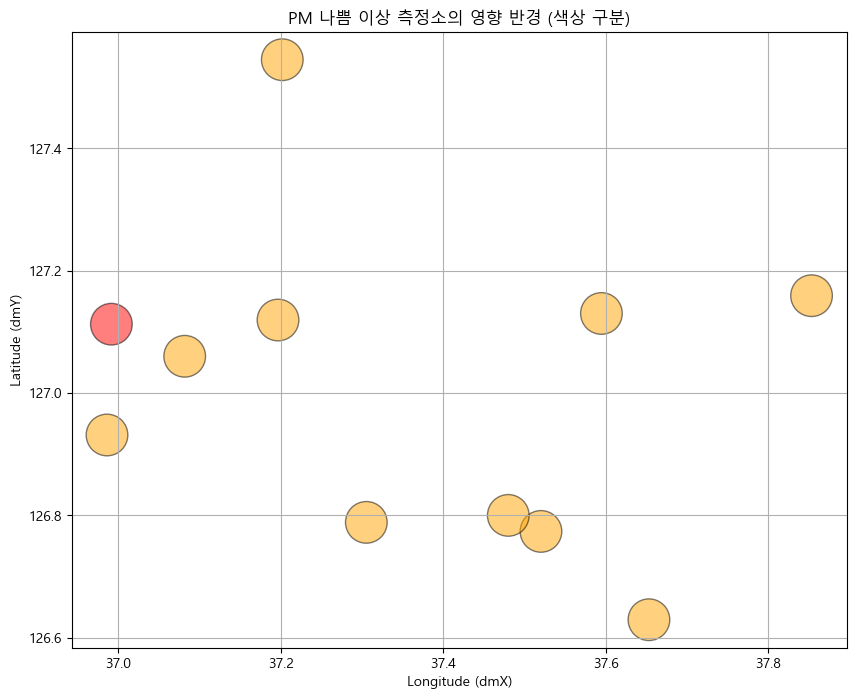

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트 설정 (윈도우 기준)
plt.rcParams['axes.unicode_minus'] = False
# 데이터 불러오기
df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_정보_PM_Grades.xlsx")

# 필터링: PM10 또는 PM25가 Bad 이상인 경우
filtered = df[
    (df["PM10_Grade"].isin(["Bad", "Very Bad"])) |
    (df["PM25_Grade"].isin(["Bad", "Very Bad"]))
].copy()


# 측정망 영향 반경 정의
radius_map = {
    "도시대기": 3,
    "도로변대기": 0.2,
    "교외대기": 10,
    "항만": 5,
    "국가배경농도": 35
}

# 안전한 대입 방식
filtered.loc[:, "radius_km"] = filtered["mangName"].map(radius_map)
filtered.loc[:, "color"] = filtered.apply(get_color, axis=1)

# 색상 결정 함수
def get_color(row):
    if row["PM10_Grade"] == "Very Bad" or row["PM25_Grade"] == "Very Bad":
        return "#FF0000"  # 빨강
    else:
        return "#FFA500"  # 주황

filtered["color"] = filtered.apply(get_color, axis=1)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(
    filtered["dmX"], filtered["dmY"],
    s=filtered["radius_km"] * 300,
    alpha=0.5,
    c=filtered["color"],
    edgecolors="black"
)
plt.xlabel("Longitude (dmX)")
plt.ylabel("Latitude (dmY)")
plt.title("PM 나쁨 이상 측정소의 영향 반경 (색상 구분)")
plt.grid(True)
plt.show()


## **PM 등급이 나쁨 이상일 경우 출력 (각 월마다)**

In [5]:
import pandas as pd

# 1. 파일 불러오기
df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\측정소별_대기질_5개월.xlsx")

# 2. 등급 분류 함수 정의
def classify_pm10(value):
    if value >= 151:
        return "Very Bad"
    elif 81 <= value <= 150:
        return "Bad"
    elif 31 <= value <= 80:
        return "Moderate"
    else:
        return "Good"

def classify_pm25(value):
    if value >= 76:
        return "Very Bad"
    elif 36 <= value <= 75:
        return "Bad"
    elif 16 <= value <= 35:
        return "Moderate"
    else:
        return "Good"

# 3. 열 추가
df["PM10_Grade"] = df["pm10Value"].apply(classify_pm10)
df["PM25_Grade"] = df["pm25Value"].apply(classify_pm25)

# 4. 새 파일로 저장
df.to_excel("측정소별_5개월_정보_PM_Grades.xlsx", index=False, engine="openpyxl")


In [7]:
df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_5개월_정보_PM_Grades.xlsx")  # 파일 경로/이름 수정

bad_rows = df[
    (df["PM10_Grade"].isin(["Bad", "Very Bad"])) |
    (df["PM25_Grade"].isin(["Bad", "Very Bad"]))
].copy()


bad_rows.to_excel("측정소별_5개월_Only_PM_Bad.xlsx", index=False, engine="openpyxl")

5개월치 평균을 내버리면 bad가 한번 이상 등급이 나왔어도 데이터가 사라질 수 있기 때문에 각 월마다 등급도 확인한 후, 한번이라도 bad 이상의 등급을 받은 측정소가 있다면 그 데이터들만 모아 만들었다.  

In [9]:
df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_5개월_Only_PM_Bad.xlsx") 

#측정소 기준으로 등장 횟수 세기
station_counts = df["msrstnName"].value_counts().reset_index()
station_counts.columns = ["측정소이름", "등장횟수"]


station_counts.to_excel("측정소별_bad등장횟수.xlsx", index=False)

bad 이상 등급을 한번이라도 받은 측정소 등장 횟수를 봤을 때, 

꼭 빈도수가 크지 않더라도 한 번 수치가 크게 나오면 5개월치 평균을 냈을 때도 수치가 높게 나오므로

한번이라도 bad 이상 등급이 뜬 측정소 정보를 저장했다. 

## **pm 수치 높게 나온 측정소들만 정보 저장**

In [11]:
import pandas as pd

count_df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_bad등장횟수.xlsx")
station_names = count_df["측정소이름"].dropna().unique()

info_df = pd.read_excel(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\측정소별_정보및평균_시도별(최종).xlsx")
filtered_info = info_df[info_df["stationName"].isin(station_names)]

filtered_info.to_csv("등장한_측정소_정보.csv", index=False, encoding="utf-8-sig")


In [17]:
city_df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\최종\bad_측정소_정보.csv")
city = city_df["city"].value_counts()
print(city)

city
경기    32
인천     9
충남     8
충북     6
경북     4
서울     1
전북     1
강원     1
대전     1
Name: count, dtype: int64


그래도 확실히 경기권 측정소가 많이나옴

### **그렇다면? 미세먼지 경보 발령 빈도수를 확인하자**

에어코리아 미세먼지 경보 발령 현황 데이터 사용해서 각 권역당 빈도수 확인하고,

위 도시별 측정소 개수와 다르게 나오면 그 지역도 미세먼지 안 좋다는 거니까 분석에 참고하자

In [37]:
import requests
import json
import pandas as pd

url = "http://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo"

params = {
    "serviceKey": "MHvlzNam3wWWhRUWK8XuAJVt6BwnazlfQQ4BG8gBSXiA8Zxec3urkCInlYFlfpjUV0UodDYrQUeaYSdAZ7cL5g==",
    "returnType": "json",
    "numOfRows" : "100",
    "year" : "2024",
    "pageNo": "1",
}

response = requests.get(url, params=params)
print(response.status_code)

200


In [22]:
url = "http://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo"
service_key = "MHvlzNam3wWWhRUWK8XuAJVt6BwnazlfQQ4BG8gBSXiA8Zxec3urkCInlYFlfpjUV0UodDYrQUeaYSdAZ7cL5g=="

all_items = []
page = 1

while True:
    params = {
        "serviceKey": service_key,
        "returnType": "json",
        "numOfRows": "100",
        "year": "2024",
        "pageNo": str(page),
        "itemCode": "PM10",  #PM10만 조회
    }

    response = requests.get(url, params=params)
    data = response.json()

    try:
        items = data["response"]["body"]["items"]
    except KeyError:
        print("API 호출 오류 또는 응답 없음")
        break

    if not items:
        break  # 더 이상 데이터가 없으면 종료

    all_items.extend(items)
    page += 1  # 다음 페이지로

# 데이터프레임으로 저장
df = pd.DataFrame(all_items)
df.to_csv("2024_PM10_경보목록.csv", index=False, encoding="utf-8-sig")

print(f"✅ 2024년 PM10 경보 데이터 {len(df)}건 저장 완료")


✅ 2024년 PM10 경보 데이터 286건 저장 완료


In [23]:
url = "http://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo"
service_key = "MHvlzNam3wWWhRUWK8XuAJVt6BwnazlfQQ4BG8gBSXiA8Zxec3urkCInlYFlfpjUV0UodDYrQUeaYSdAZ7cL5g=="

all_items = []
page = 1

while True:
    params = {
        "serviceKey": service_key,
        "returnType": "json",
        "numOfRows": "100",
        "year": "2025",
        "pageNo": str(page),
        "itemCode": "PM10",  #PM10만 조회
    }

    response = requests.get(url, params=params)
    data = response.json()

    try:
        items = data["response"]["body"]["items"]
    except KeyError:
        print("API 호출 오류 또는 응답 없음")
        break

    if not items:
        break  # 더 이상 데이터가 없으면 종료

    all_items.extend(items)
    page += 1  # 다음 페이지로

# 데이터프레임으로 저장
df = pd.DataFrame(all_items)
df.to_csv("2025_PM10_경보목록.csv", index=False, encoding="utf-8-sig")

print(f"✅ 2025년 PM10 경보 데이터 {len(df)}건 저장 완료")

✅ 2025년 PM10 경보 데이터 52건 저장 완료


In [26]:
import pandas as pd

# 두 파일 불러오기
df_2024 = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\2024_PM10_경보목록.csv")
df_2025 = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\2025_PM10_경보목록.csv")

# 합치기 (행 기준으로 이어붙이기)
merged_df = pd.concat([df_2024, df_2025], ignore_index=True)

# 저장
merged_df.to_csv("PM10_경보_2024_2025_통합.csv", index=False, encoding="utf-8-sig")

In [27]:
url = "http://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo"
service_key = "MHvlzNam3wWWhRUWK8XuAJVt6BwnazlfQQ4BG8gBSXiA8Zxec3urkCInlYFlfpjUV0UodDYrQUeaYSdAZ7cL5g=="

all_items = []
page = 1

while True:
    params = {
        "serviceKey": service_key,
        "returnType": "json",
        "numOfRows": "100",
        "year": "2024",
        "pageNo": str(page),
        "itemCode": "PM25",  #PM10만 조회
    }

    response = requests.get(url, params=params)
    data = response.json()

    try:
        items = data["response"]["body"]["items"]
    except KeyError:
        print("API 호출 오류 또는 응답 없음")
        break

    if not items:
        break  # 더 이상 데이터가 없으면 종료

    all_items.extend(items)
    page += 1  # 다음 페이지로

# 데이터프레임으로 저장
df = pd.DataFrame(all_items)
df.to_csv("2024_PM25_경보목록.csv", index=False, encoding="utf-8-sig")

print(f"✅ 2024년 PM25 경보 데이터 {len(df)}건 저장 완료")

✅ 2024년 PM25 경보 데이터 75건 저장 완료


In [28]:
url = "http://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo"
service_key = "MHvlzNam3wWWhRUWK8XuAJVt6BwnazlfQQ4BG8gBSXiA8Zxec3urkCInlYFlfpjUV0UodDYrQUeaYSdAZ7cL5g=="

all_items = []
page = 1

while True:
    params = {
        "serviceKey": service_key,
        "returnType": "json",
        "numOfRows": "100",
        "year": "2025",
        "pageNo": str(page),
        "itemCode": "PM25",  #PM10만 조회
    }

    response = requests.get(url, params=params)
    data = response.json()

    try:
        items = data["response"]["body"]["items"]
    except KeyError:
        print("API 호출 오류 또는 응답 없음")
        break

    if not items:
        break  # 더 이상 데이터가 없으면 종료

    all_items.extend(items)
    page += 1  # 다음 페이지로

# 데이터프레임으로 저장
df = pd.DataFrame(all_items)
df.to_csv("2025_PM25_경보목록.csv", index=False, encoding="utf-8-sig")

print(f"✅ 2025년 PM25 경보 데이터 {len(df)}건 저장 완료")

✅ 2025년 PM25 경보 데이터 71건 저장 완료


In [29]:
import pandas as pd

# 두 파일 불러오기
df_2024 = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\2024_PM25_경보목록.csv")
df_2025 = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\2025_PM25_경보목록.csv")

# 합치기 (행 기준으로 이어붙이기)
merged_df = pd.concat([df_2024, df_2025], ignore_index=True)

# 저장
merged_df.to_csv("PM25_경보_2024_2025_통합.csv", index=False, encoding="utf-8-sig")

**pm10 : 2025 (52건) 2024 (286건)**

**pm25 : 2025 (71건) 2024 (75건)**

## **경보 빈도수 지역별로 카운트**

In [33]:
import pandas as pd

# 1. 통합된 경보 CSV 파일 불러오기
df10 = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\PM10_경보_2024_2025_통합.csv")
df25 = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\PM25_경보_2024_2025_통합.csv")

# 2. 필요한 열만 선택
selected_df10 = df10[["districtName", "issueVal", "moveName", "issueGbn"]]
selected_df25 = df25[["districtName", "issueVal", "moveName", "issueGbn"]]

# 3. 결과를 새 파일로 저장
selected_df10.to_csv("PM10_경보_2024_2025_요약.csv", index=False, encoding="utf-8-sig")
selected_df25.to_csv("PM25_경보_2024_2025_요약.csv", index=False, encoding="utf-8-sig")

## **pm10(미세먼지) 주의보+경보 지역별 빈도수**

In [34]:
issue_city_df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\PM10_경보_2024_2025_요약.csv")
city = issue_city_df["districtName"].value_counts()
print(city)

districtName
경남    79
강원    32
인천    30
경기    29
경북    20
부산    20
충북    19
충남    18
전북    18
대구    17
대전    15
전남    14
서울     7
세종     7
울산     5
광주     5
제주     3
Name: count, dtype: int64


**pm10(미세먼지) 에 대한 경보 빈도수를 봤을 때 측정소 평균 수치가 높게 나온 개수와 다르게 지역이 선정됨.**

## **pm25(초미세먼지) 주의보+경보 지역별 빈도수**

In [35]:
issue_city_df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\PM25_경보_2024_2025_요약.csv")
city = issue_city_df["districtName"].value_counts()
print(city)

districtName
인천    42
경기    23
충남    17
충북    12
경남     9
서울     7
대전     7
전북     7
경북     5
세종     5
부산     4
강원     3
제주     2
울산     1
광주     1
대구     1
Name: count, dtype: int64


**pm25(미세먼지) 에 대한 경보 빈도수를 봤을 때도 측정소 평균 수치가 높게 나온 개수와 다르게 지역이 선정됨.**

**심지어 pm10과 pm25 경보에 대한 빈도수도 지역이 다름**

## **pm10, 25 경보 지역별 빈도수**

In [38]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\PM10_경보_2024_2025_요약.csv")

#issueGbn이 "경보"인 행만 필터링
alarm_df = df[df["issueGbn"] == "경보"]

alarm_counts = alarm_df["districtName"].value_counts().reset_index()
alarm_counts.columns = ["districtName", "경보횟수"]

print(alarm_counts)


   districtName  경보횟수
0            경남     7
1            인천     7
2            강원     6
3            경기     5
4            부산     4
5            경북     2
6            충남     2
7            대전     2
8            충북     2
9            대구     1
10           울산     1
11           서울     1
12           전북     1


In [39]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\측정소 데이터\경보\PM25_경보_2024_2025_요약.csv")

#issueGbn이 "경보"인 행만 필터링
alarm_df = df[df["issueGbn"] == "경보"]

alarm_counts = alarm_df["districtName"].value_counts().reset_index()
alarm_counts.columns = ["districtName", "경보횟수"]

print(alarm_counts)


  districtName  경보횟수
0           경북     1


## **다음은 지역 > 권역별 빈도수 (더 자세하게)**

In [44]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\데이터\최종\PM10_경보(최종).csv")

# 2. 도시(districtName) + 권역(moveName) 기준으로 그룹화하여 통계 생성
grouped = df.groupby(["districtName", "moveName"]).agg(
    mean=("issueVal", "mean"),                       # issueVal 평균
    count=("moveName", "count"),                     # 총 발령 횟수
    주의보=("issueGbn", lambda x: (x == "주의보").sum()),  # 주의보 횟수
    경보=("issueGbn", lambda x: (x == "경보").sum())       # 경보 횟수
).reset_index()

# 3. 저장
grouped.to_csv("PM10_경보_권역별.csv", index=False, encoding="utf-8-sig")


In [45]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\데이터\최종\PM25_경보(최종).csv")

# 2. 도시(districtName) + 권역(moveName) 기준으로 그룹화하여 통계 생성
grouped = df.groupby(["districtName", "moveName"]).agg(
    mean=("issueVal", "mean"),                       # issueVal 평균
    count=("moveName", "count"),                     # 총 발령 횟수
    주의보=("issueGbn", lambda x: (x == "주의보").sum()),  # 주의보 횟수
    경보=("issueGbn", lambda x: (x == "경보").sum())       # 경보 횟수
).reset_index()

# 3. 저장
grouped.to_csv("PM25_경보_권역별.csv", index=False, encoding="utf-8-sig")

In [46]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\데이터\최종\PM10_경보_권역별.csv")
df

,districtName,moveName,mean,count,주의보,경보
0,강원,영동남부,226.000000,7,5,2
1,강원,영동북부,216.888889,9,7,2
2,강원,영서남부,223.125000,8,7,1
3,강원,영서북부,206.000000,8,7,1
4,경기,남부권,224.833333,6,5,1
...,...,...,...,...,...,...
61,충남,북부권역,220.555556,9,7,2
62,충남,서부권역,204.000000,4,4,0
63,충북,남부권역,226.500000,6,6,0
64,충북,북부권역,232.500000,6,5,1


In [47]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\데이터\최종\PM25_경보_권역별.csv")
df

,districtName,moveName,mean,count,주의보,경보
0,강원,영서남부,82.000000,2,2,0
1,강원,영서북부,81.000000,1,1,0
2,경기,남부권,80.250000,8,8,0
3,경기,동부권,79.000000,3,3,0
4,경기,북부권,79.600000,5,5,0
5,경기,중부권,80.714286,7,7,0
6,경남,거제권역,80.000000,1,1,0
7,경남,거창권역,90.000000,1,1,0
8,경남,고성권역,81.000000,1,1,0
9,경남,밀양권역,79.000000,1,1,0


## **권역별로 빈도수 많은 거 순으로**

In [51]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\데이터\최종\PM10_경보_권역별.csv")
df_sorted = df.sort_values(by="count", ascending=False)

#정렬된 결과
print(df_sorted)
df_sorted.to_csv("PM10_경보_권역별_정렬.csv", index=False, encoding="utf-8-sig")

   districtName moveName        mean  count  주의보  경보
61           충남     북부권역  220.555556      9    7   2
6            경기      북부권  217.000000      9    7   2
1            강원     영동북부  216.888889      9    7   2
38           대구     군위권역  225.111111      9    8   1
40           대전     동부권역  233.111111      9    7   2
..          ...      ...         ...    ...  ...  ..
19           경남     산청권역  224.000000      1    1   0
31           경남    함양·거창  178.000000      1    1   0
15           경남    밀양·창녕  153.000000      1    1   0
13           경남    남해·하동  156.000000      1    1   0
18           경남    산청·합천  154.000000      1    1   0

[66 rows x 6 columns]


In [52]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\데분개\데이터\최종\PM25_경보_권역별.csv")
df_sorted = df.sort_values(by="count", ascending=False)

#정렬된 결과
print(df_sorted)
df_sorted.to_csv("PM25_경보_권역별_정렬.csv", index=False, encoding="utf-8-sig")

   districtName moveName        mean  count  주의보  경보
30           인천  영종·영흥권역   82.846154     13   13   0
27           인천     강화권역   88.200000     10   10   0
29           인천     서부권역   84.700000     10   10   0
28           인천    동남부권역   80.666667      9    9   0
2            경기      남부권   80.250000      8    8   0
36           충남     북부권역   78.500000      8    8   0
5            경기      중부권   80.714286      7    7   0
24           서울     서울권역   84.285714      7    7   0
40           충북     중부권역   82.600000      5    5   0
35           충남    동남부권역   81.000000      5    5   0
25           세종     세종권역   86.400000      5    5   0
39           충북     북부권역   80.400000      5    5   0
4            경기      북부권   79.600000      5    5   0
37           충남     서부권역   76.000000      4    4   0
33           전북     중부권역   80.000000      4    4   0
14           경북     서부권역  107.000000      4    3   1
18           대전     동부권역   92.250000      4    4   0
19           대전     서부권역   85.333333      3   